In [1]:
import os
os.chdir("..")

In [2]:
from hydra.experimental import compose, initialize
from hydra.utils import instantiate
from omegaconf import OmegaConf
from humseg.dataset import HumsegDataModule
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
with initialize(config_path="./../conf", job_name="test_app"):
    cfg = compose(config_name="config", overrides=["augmentation=test"])
    
cfg.data.basepath = "./data/"

In [4]:
datamodule = instantiate(cfg.datamodule, cfg=cfg)

In [5]:
datamodule.setup(stage="fit")
train_images, train_masks = next(iter(datamodule.train_dataloader()))
val_images, val_masks = next(iter(datamodule.val_dataloader()))

In [6]:
datamodule.setup(stage="test")
test_images = next(iter(datamodule.test_dataloader()))

In [7]:
def plot_images_with_masks(
    ids: np.ndarray, images: np.ndarray, masks: np.ndarray = None
) -> None:
    fig, axs = plt.subplots(3, 2, figsize=(8, 12))
    
    for i, sample_id in enumerate(ids):
        img = images[sample_id].permute([1, 2, 0]).numpy()
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axs[i, 0].imshow(img)
        
        if masks is not None:
            mask = masks[sample_id].numpy().squeeze()
            axs[i, 1].imshow(mask)

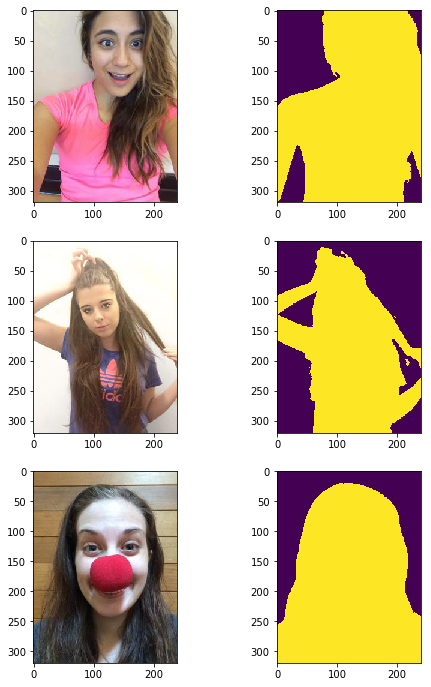

In [8]:
train_ids = np.random.randint(0, len(train_images), 3)
plot_images_with_masks(train_ids, train_images, train_masks)

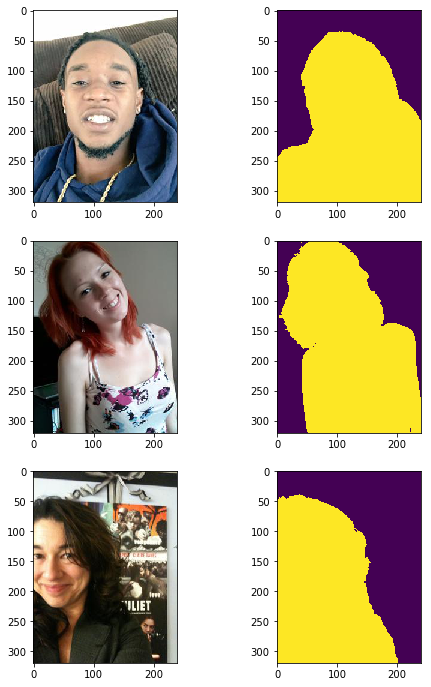

In [9]:
val_ids = np.random.randint(0, len(val_images), 3)
plot_images_with_masks(val_ids, val_images, val_masks)

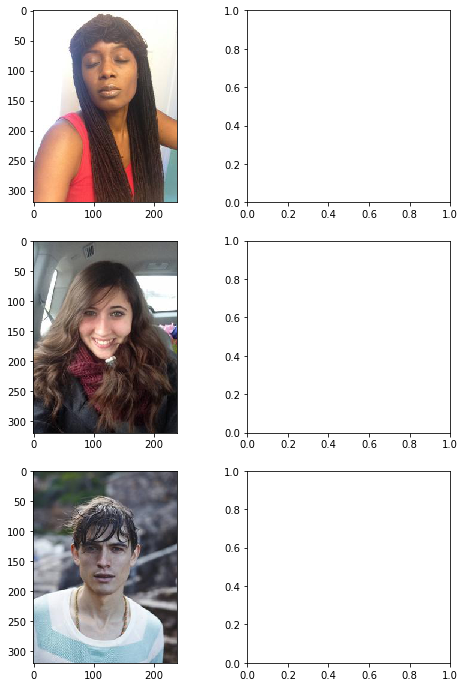

In [10]:
test_ids = np.random.randint(0, len(test_images), 3)

plot_images_with_masks(test_ids, test_images)